<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/lstm_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf
from keras.initializers import RandomNormal

In [ ]:


stock_symbol = 'TSLA'
df = yf.download(stock_symbol,period="60mo",interval="1d")
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-09-21  19.846666  20.038668  19.691334  19.940001  19.940001   75757500
2018-09-24  19.898666  20.200001  19.572001  19.978666  19.978666   72645000
2018-09-25  20.000000  20.306667  19.766666  20.066000  20.066000   67225500
2018-09-26  20.127333  20.926001  20.073999  20.638666  20.638666  117648000
2018-09-27  20.860001  20.997334  20.460667  20.501333  20.501333  127636500


Importing Data

In [ ]:
df.index = df.index.strftime('%Y-%m-%d')

In [ ]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-21,19.846666,20.038668,19.691334,19.940001,19.940001,75757500
2018-09-24,19.898666,20.200001,19.572001,19.978666,19.978666,72645000
2018-09-25,20.000000,20.306667,19.766666,20.066000,20.066000,67225500
2018-09-26,20.127333,20.926001,20.073999,20.638666,20.638666,117648000
2018-09-27,20.860001,20.997334,20.460667,20.501333,20.501333,127636500
...,...,...,...,...,...,...
2023-09-14,271.320007,276.709991,270.420013,276.040009,276.040009,107709800
2023-09-15,277.549988,278.980011,271.000000,274.390015,274.390015,133422800
2023-09-18,271.160004,271.440002,263.760010,265.279999,265.279999,101543300


In [ ]:
len(df)

1257

<Axes: xlabel='Date'>

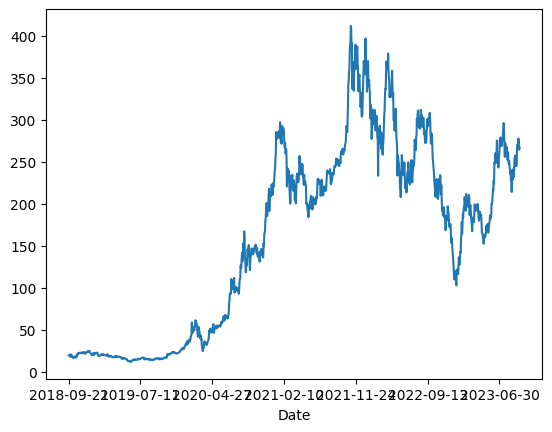

In [ ]:
df['Open'].plot()

In [ ]:
b_size=16
epoch=1000
train_per=0.8
w_size=7
f_size=30

In [ ]:
t_size=int(len(df)*train_per)

Train-Test Split

In [ ]:
training = df.iloc[:t_size, 1:2].values
testing = df.iloc[t_size:, 1:2].values

Normalization

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

Create target values

In [ ]:
x_train = []
y_train = []
for iter in range(w_size, t_size):
    x_train.append(training_scaled[iter-w_size:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Defining Model

In [ ]:
initializer = RandomNormal(mean=0.0, stddev=0.05)
algo = Sequential()
algo.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1),kernel_initializer=initializer))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(algo.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 7, 60)             14880     
                                                                 
 dropout_8 (Dropout)         (None, 7, 60)             0         
                                                                 
 lstm_9 (LSTM)               (None, 7, 60)             29040     
                                                                 
 dropout_9 (Dropout)         (None, 7, 60)             0         
                                                                 
 lstm_10 (LSTM)              (None, 7, 60)             29040     
                                                                 
 dropout_10 (Dropout)        (None, 7, 60)             0         
                                                                 
 lstm_11 (LSTM)              (None, 60)               

Training Model

In [ ]:
algo.fit(x_train, y_train, epochs = epoch, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/1000
53/53 - 7s - loss: 0.0325 - val_loss: 0.0046 - 7s/epoch - 138ms/step
Epoch 2/1000
53/53 - 0s - loss: 0.0048 - val_loss: 0.0032 - 448ms/epoch - 8ms/step
Epoch 3/1000
53/53 - 0s - loss: 0.0030 - val_loss: 0.0035 - 405ms/epoch - 8ms/step
Epoch 4/1000
53/53 - 0s - loss: 0.0026 - val_loss: 0.0034 - 438ms/epoch - 8ms/step
Epoch 5/1000
53/53 - 1s - loss: 0.0030 - val_loss: 0.0033 - 509ms/epoch - 10ms/step
Epoch 6/1000
53/53 - 1s - loss: 0.0026 - val_loss: 0.0034 - 567ms/epoch - 11ms/step
Epoch 7/1000
53/53 - 1s - loss: 0.0036 - val_loss: 0.0032 - 535ms/epoch - 10ms/step
Epoch 8/1000
53/53 - 1s - loss: 0.0031 - val_loss: 0.0041 - 556ms/epoch - 10ms/step
Epoch 9/1000
53/53 - 0s - loss: 0.0025 - val_loss: 0.0035 - 439ms/epoch - 8ms/step
Epoch 10/1000
53/53 - 0s - loss: 0.0023 - val_loss: 0.0031 - 409ms/epoch - 8ms/step
Epoch 11/1000
53/53 - 0s - loss: 0.0026 - val_loss: 0.0038 - 412ms/epoch - 8ms/step
Epoch 12/1000
53/53 - 0s - loss: 0.0023 - val_loss: 0.0032 - 417ms/epoch - 8ms/ste

Dividing Test values into groups

In [ ]:
data_train = df.iloc[:t_size, 1:2]
data_test = df.iloc[t_size:, 1:2]
data_total = df.iloc[:,1:2]
total_input = data_total[len(data_total) - len(data_test) - w_size:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []
y_test=[]

# Calculate the maximum number of sequences of length w_size that can be created
max_sequences = len(total_input) - w_size

# loop to create a 2D array of x_test
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+w_size, 0])
    y_test.append(total_input[iter+w_size, 0])     #new addition

x_test = np.array(x_test)

print(x_test.shape)  #  (max_sequences, w_size)


(252, 7)


Prediction

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


8/8 [==============================] - 1s 4ms/step


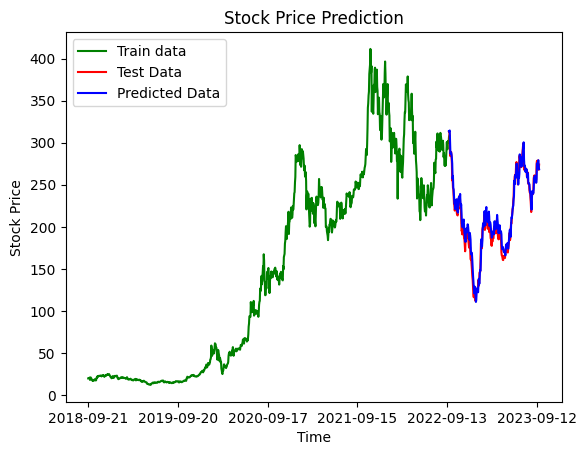

In [ ]:
df.reset_index(inplace=True)
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


IndexError: ignored

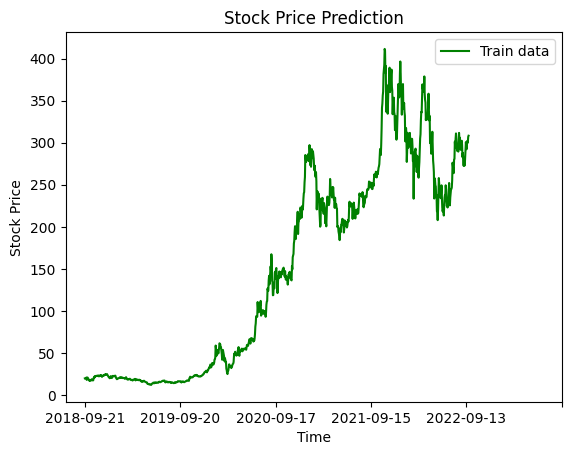

In [ ]:
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")

plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

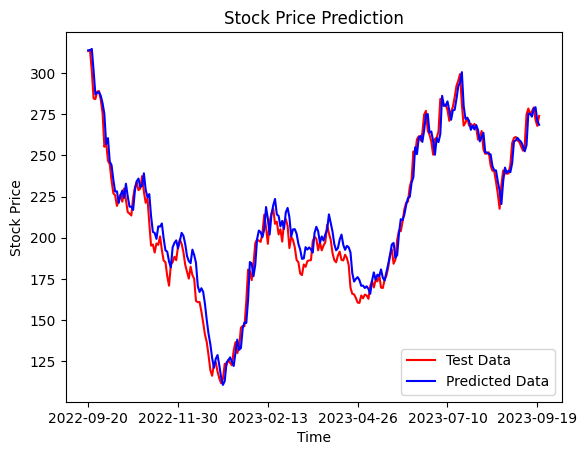

In [ ]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data_test.values,predicted_price)

mse = mean_squared_error(data_test.values, predicted_price)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 6.85
Mean Squared Error (MSE): 74.50
Root Mean Squared Error (RMSE): 8.63


Predict Future

In [ ]:
test2=testing.copy()
for i in range(f_size):
  X=test2[-w_size:]
  X=X.reshape(w_size,1)
  X=sc.fit_transform(X)

  X=np.reshape(X,(1,w_size,1))

  close=algo.predict(X)
  y=sc.inverse_transform(close)

  test2=np.append(test2, y)


1/1 [==============================] - 0s 28ms/step


In [ ]:
from datetime import datetime, timedelta
x=df.loc[-1:, 'Date']
day=x[len(x)-1]
date_obj = datetime.strptime(day, '%Y-%m-%d')
start_date = date_obj
date_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(f_size)]

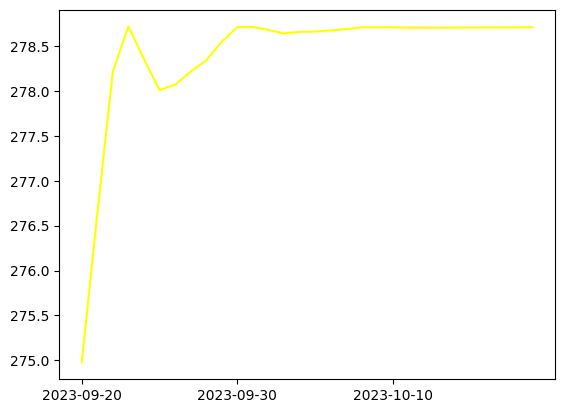

In [ ]:
forcasted_data=test2[-f_size:]
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,len(forcasted_data),10))
plt.show()

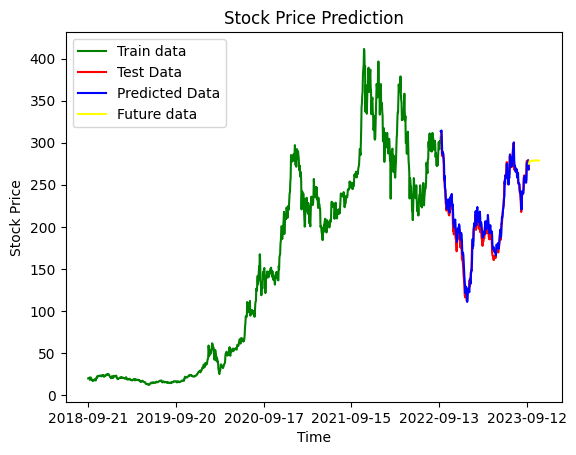

In [ ]:

plt.plot(df.loc[:t_size,'Date'],df.loc[:t_size,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

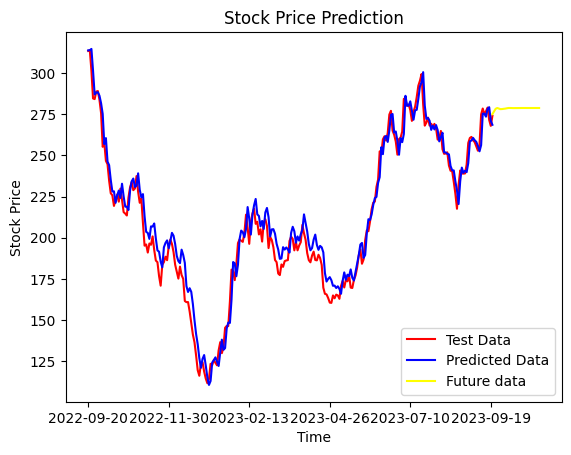

In [ ]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
forcasted_data

array([274.97686768, 276.63406372, 278.21511841, 278.71643066,
       278.35336304, 278.00741577, 278.06848145, 278.21179199,
       278.33917236, 278.54696655, 278.70907593, 278.71084595,
       278.67807007, 278.63919067, 278.65649414, 278.65975952,
       278.67178345, 278.68695068, 278.7071228 , 278.70779419,
       278.70751953, 278.70275879, 278.70266724, 278.70300293,
       278.70376587, 278.70446777, 278.70541382, 278.70703125,
       278.70703125, 278.70709229])

In [ ]:
data_test.values[-30:]

array([[251.1000061 ],
       [251.80000305],
       [243.78999329],
       [240.66000366],
       [240.5       ],
       [233.97000122],
       [226.74000549],
       [217.58000183],
       [232.13000488],
       [240.82000732],
       [238.97999573],
       [238.91999817],
       [239.        ],
       [244.38000488],
       [257.48001099],
       [260.51000977],
       [261.17999268],
       [259.07998657],
       [258.        ],
       [255.38999939],
       [252.80999756],
       [256.51998901],
       [274.8500061 ],
       [278.39001465],
       [274.98001099],
       [276.70999146],
       [278.98001099],
       [271.44000244],
       [267.8500061 ],
       [273.92999268]])